     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 2.6 MB/s eta 0:00:00
  Using cached attrs-25.3.0-py3-none-any.whl (63 kB)
  Using cached referencing-0.36.2-py3-none-any.whl (26 kB)
  Using cached jsonschema_specifications-2025.4.1-py3-none-any.whl (18 kB)
  Using cached rpds_py-0.25.1-cp310-cp310-macosx_11_0_arm64.whl (358 kB)

[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Librerías importadas correctamente
Versión de pandas: 2.2.3
Dataset cargado correctamente
Dimensiones: (10000, 13)

Primeras 5 filas:
=== INFORMACIÓN GENERAL DEL DATASET ===
Número total de viajes: 10000
Período de datos: 2023-01-01 00:00:00 a 2023-12-30 00:00:00
Países únicos: 5
Ciudades únicas: 25

=== RESUMEN ESTADÍSTICO ===
                            fecha       latitud      longitud  \
count                       10000  10000.000000  10000.000000   
mean   202

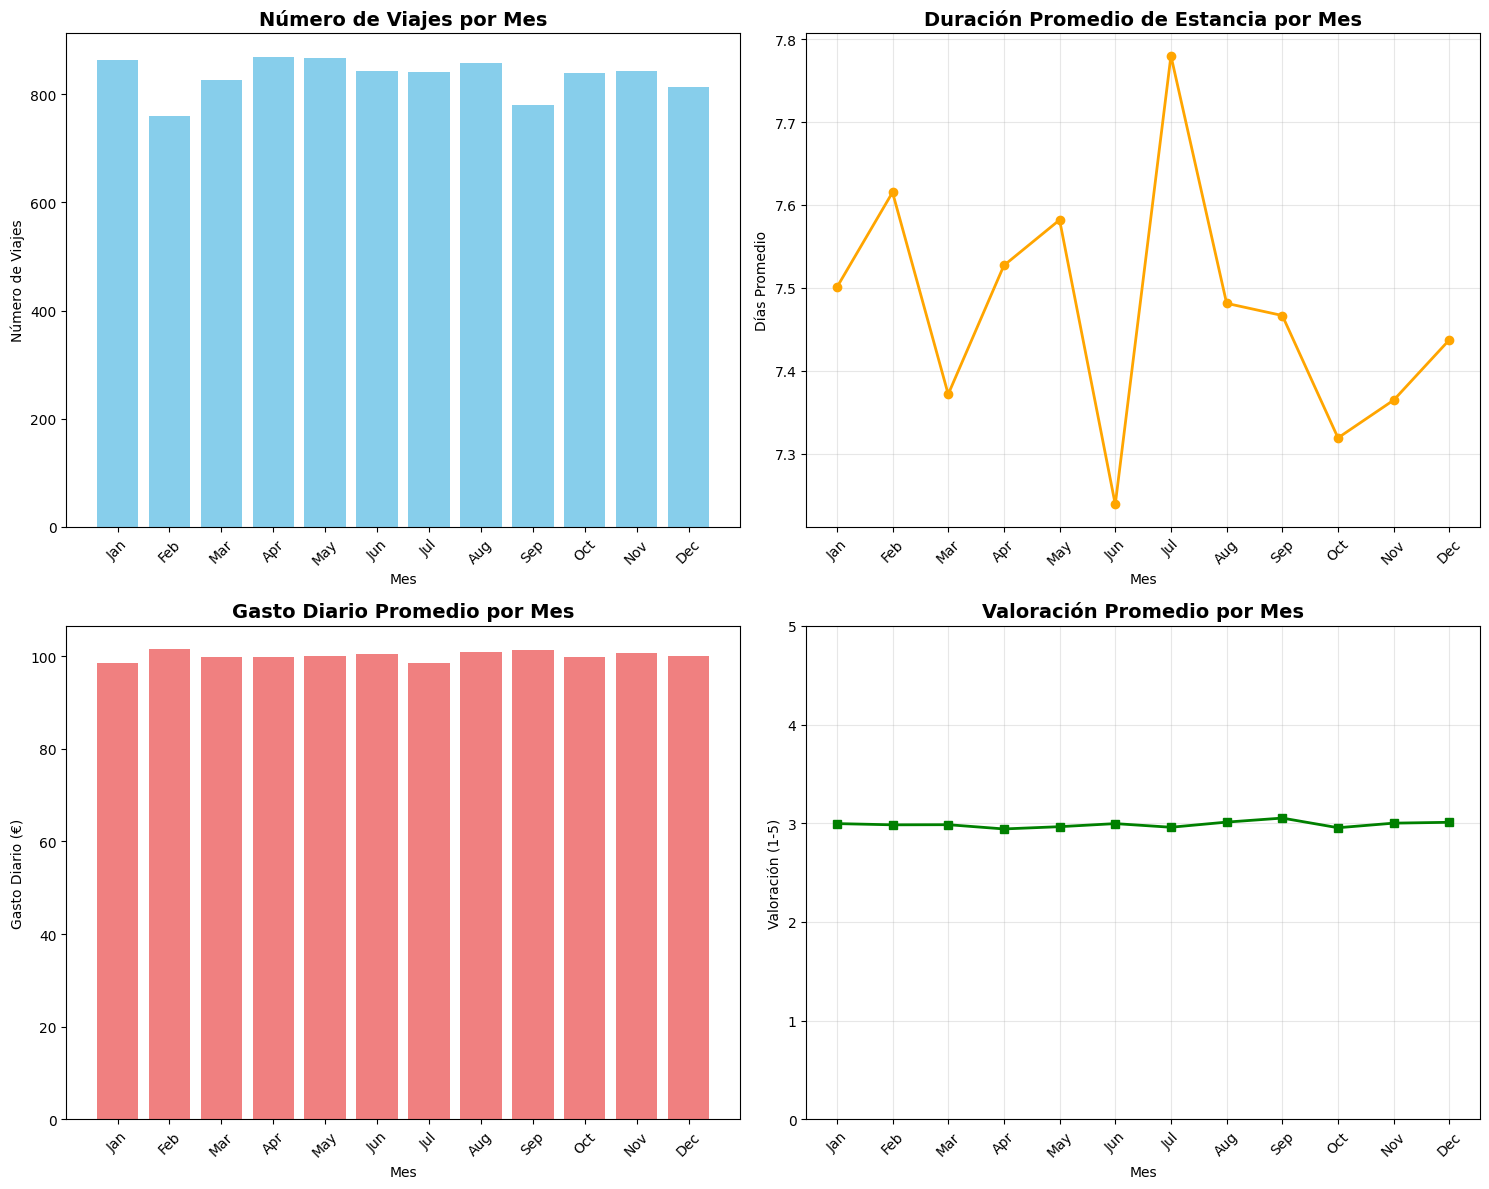

=== INSIGHTS TEMPORALES ===
• Mes más popular para viajar: April
• Duración promedio de estancia: 7.5 días
• Gasto diario promedio: 100.07€


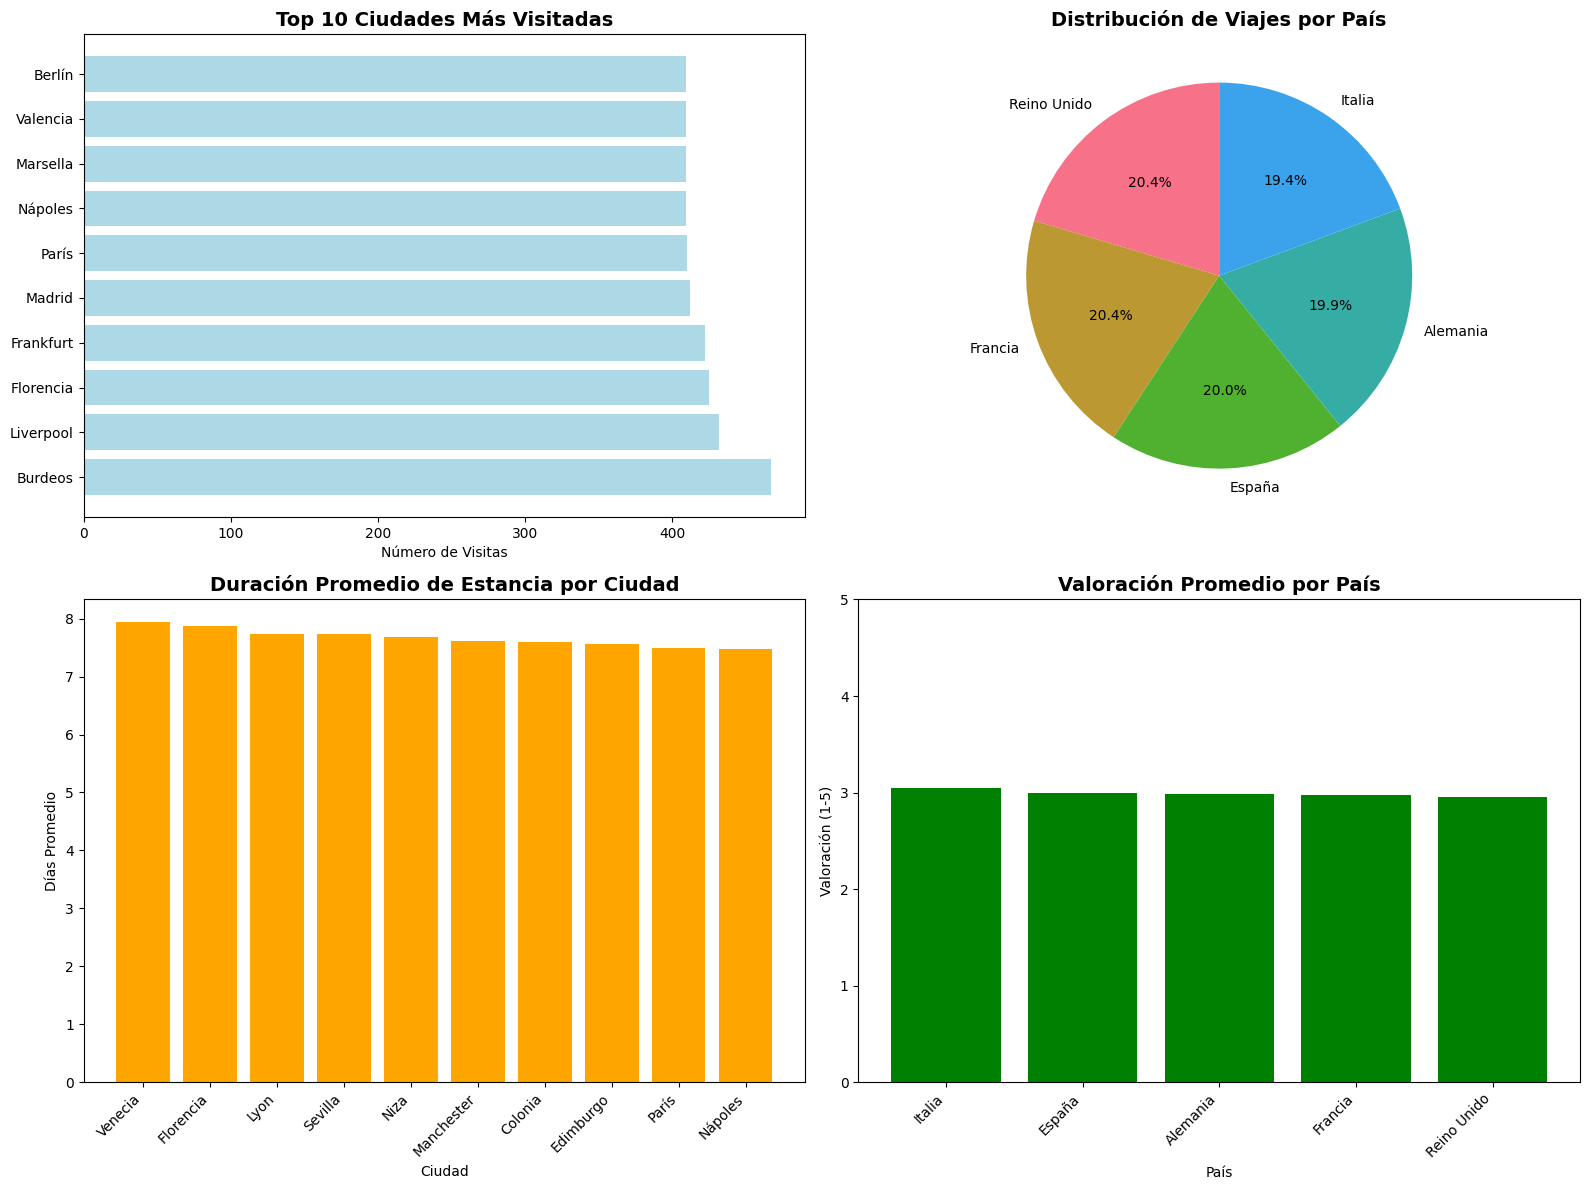

=== INSIGHTS DE DESTINOS ===
• Ciudad más visitada: Burdeos (467 visitas)
• País más visitado: Reino Unido (2041 visitas)
• Ciudad con mayor duración promedio: Venecia (7.9 días)
• País mejor valorado: Italia (3.0/5)


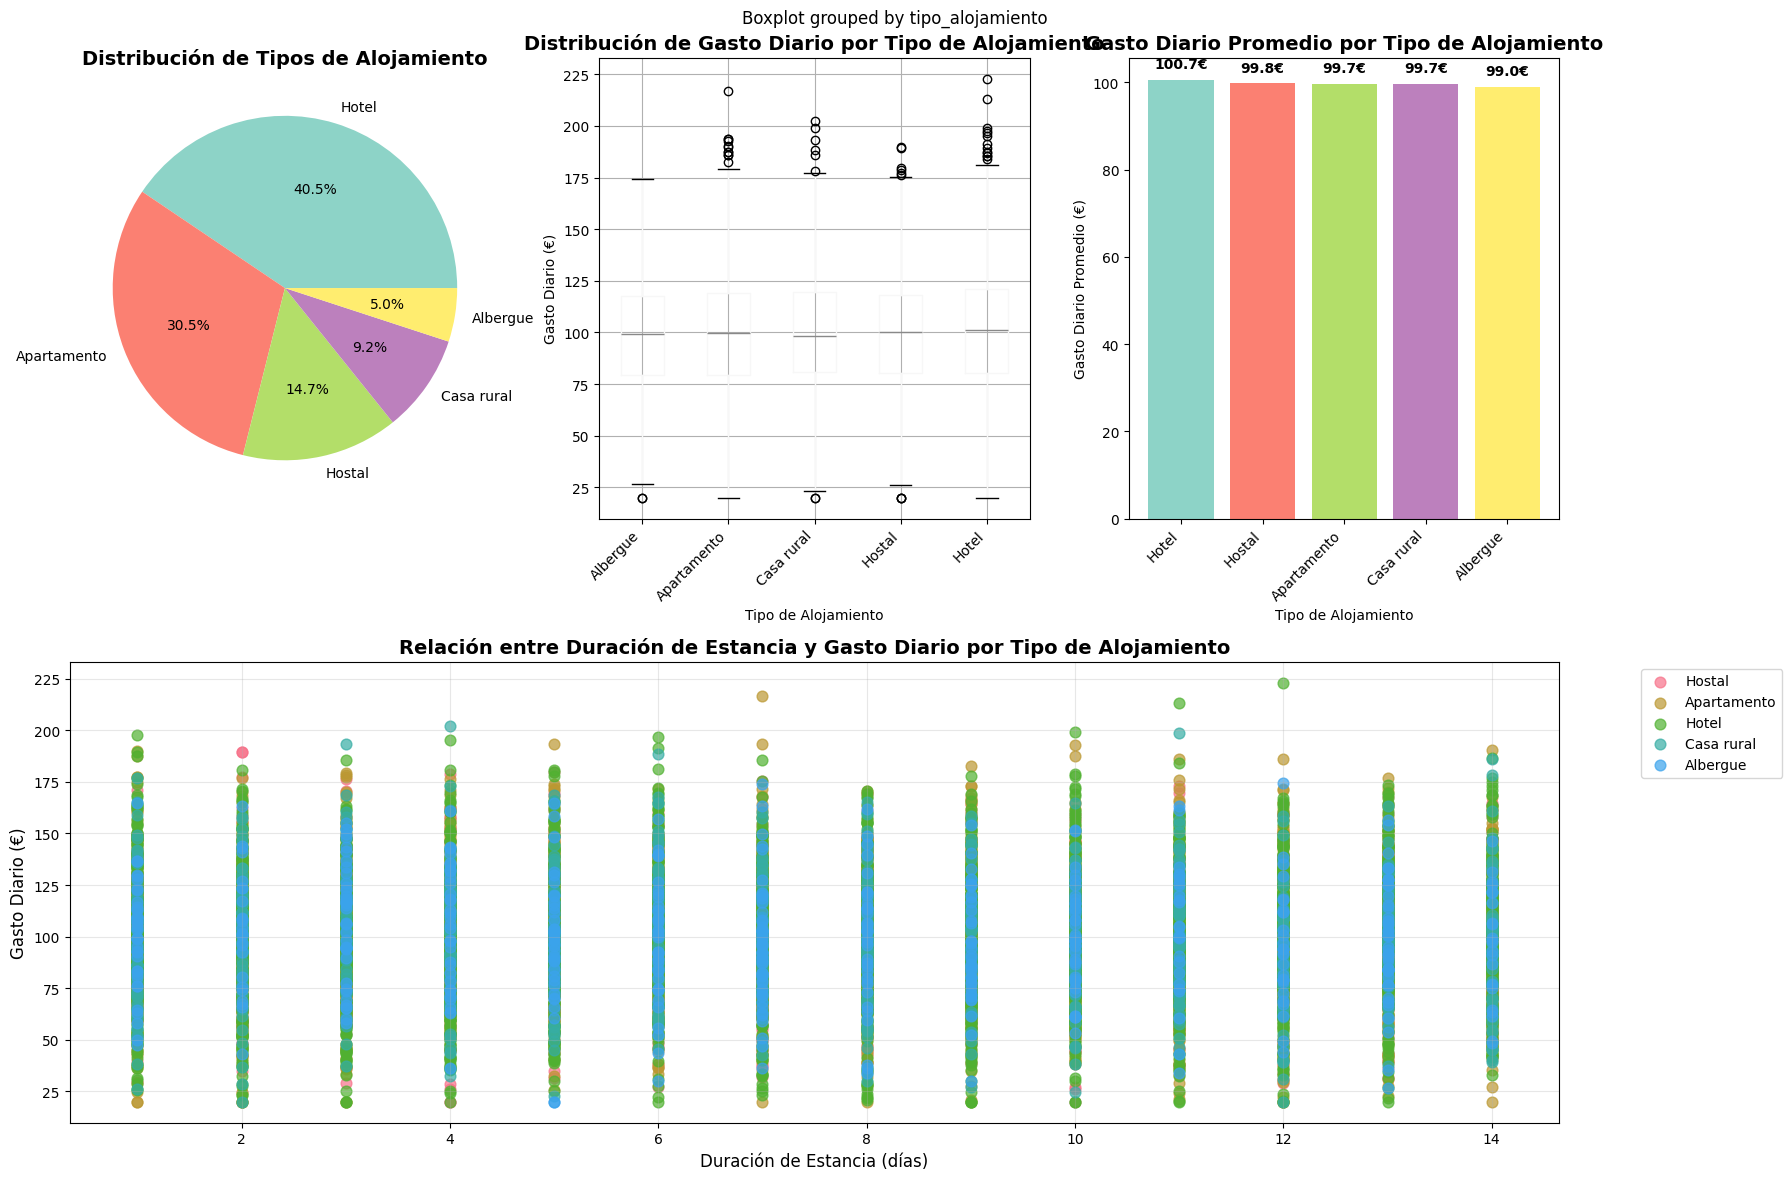

=== ANÁLISIS DETALLADO POR TIPO DE ALOJAMIENTO ===
                 gasto_diario                duracion_estancia         \
                         mean  median    std              mean median   
tipo_alojamiento                                                        
Albergue                98.97   99.28  27.94              7.36    7.0   
Apartamento             99.73   99.52  29.90              7.40    7.0   
Casa rural              99.66   98.48  29.79              7.48    8.0   
Hostal                  99.78  100.14  29.22              7.57    8.0   
Hotel                  100.66  101.01  30.50              7.50    8.0   

                 valoracion  
                       mean  
tipo_alojamiento             
Albergue               2.97  
Apartamento            2.98  
Casa rural             2.89  
Hostal                 2.94  
Hotel                  3.03  


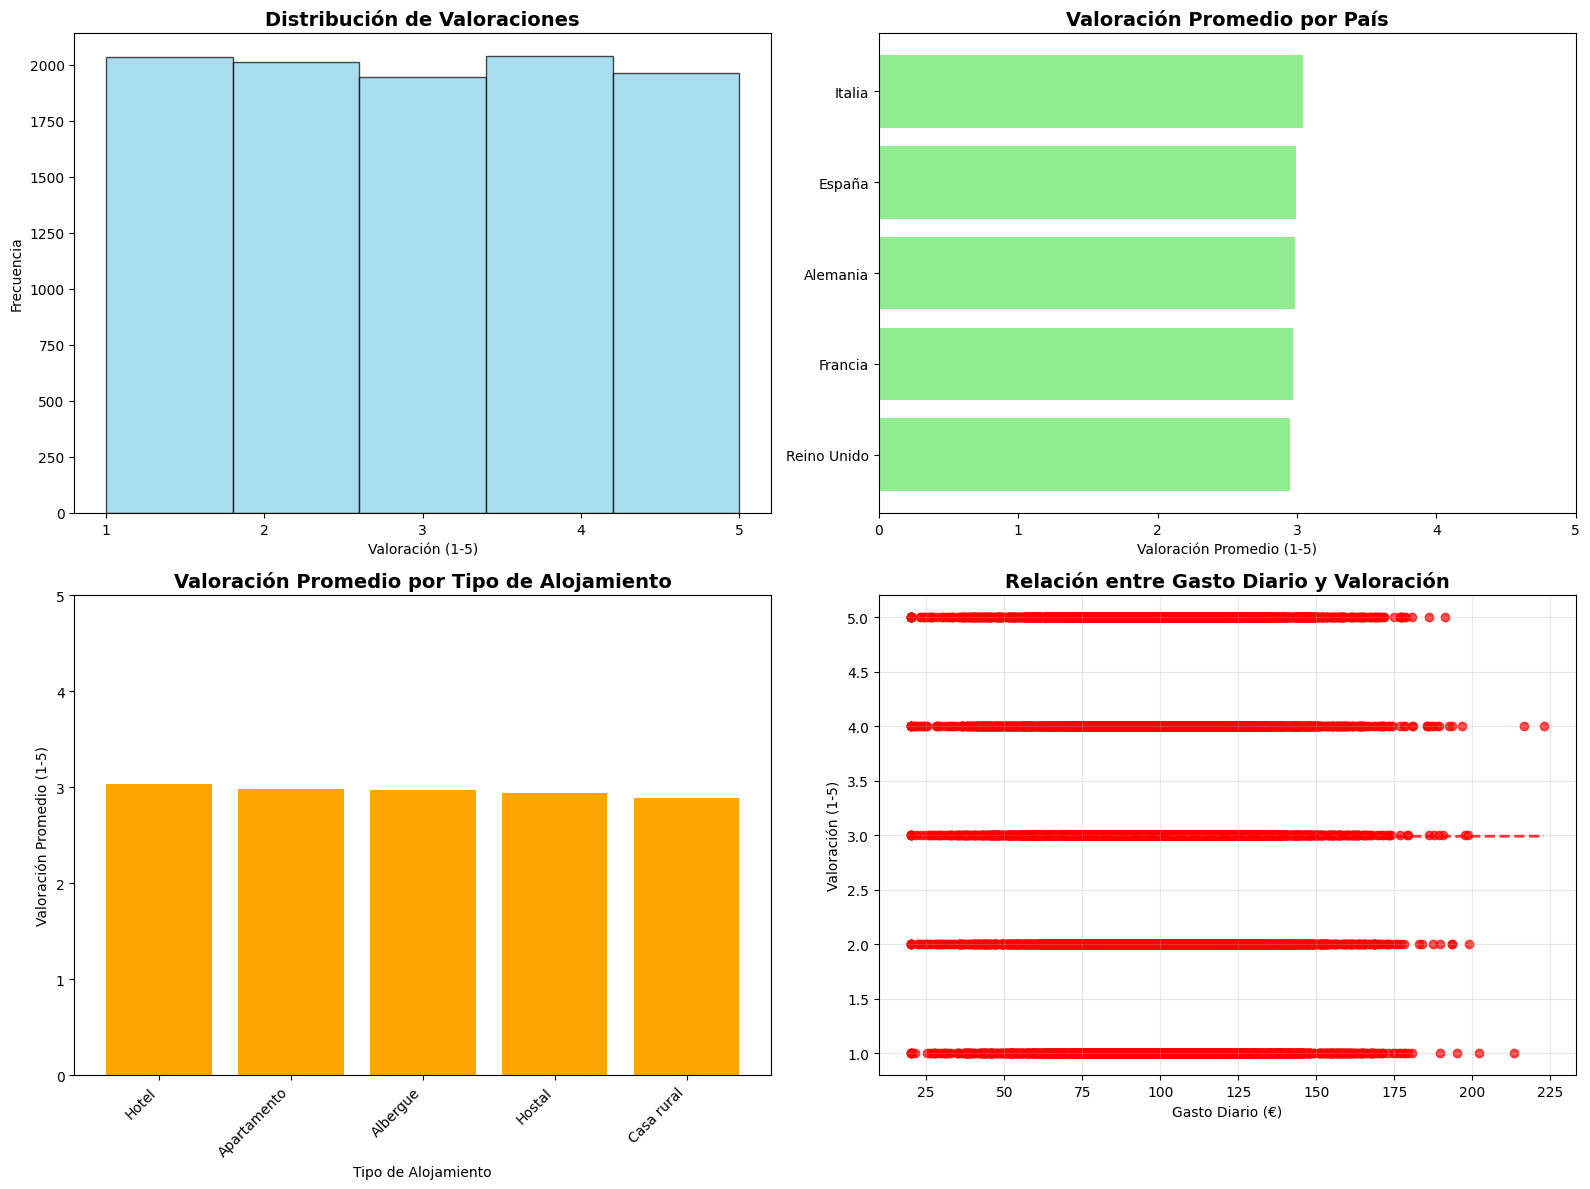

=== ANÁLISIS DE SATISFACCIÓN ===
• Correlación entre gasto diario y valoración: 0.001
• Valoración promedio general: 2.99/5
• Número de experiencias con valoración máxima (5): 1963
• Número de experiencias con valoración mínima (1): 2036


Mapa interactivo creado correctamente
• El tamaño de cada punto representa la duración de la estancia
• El color representa el país de destino
• Pasa el cursor sobre cada punto para ver detalles del viaje


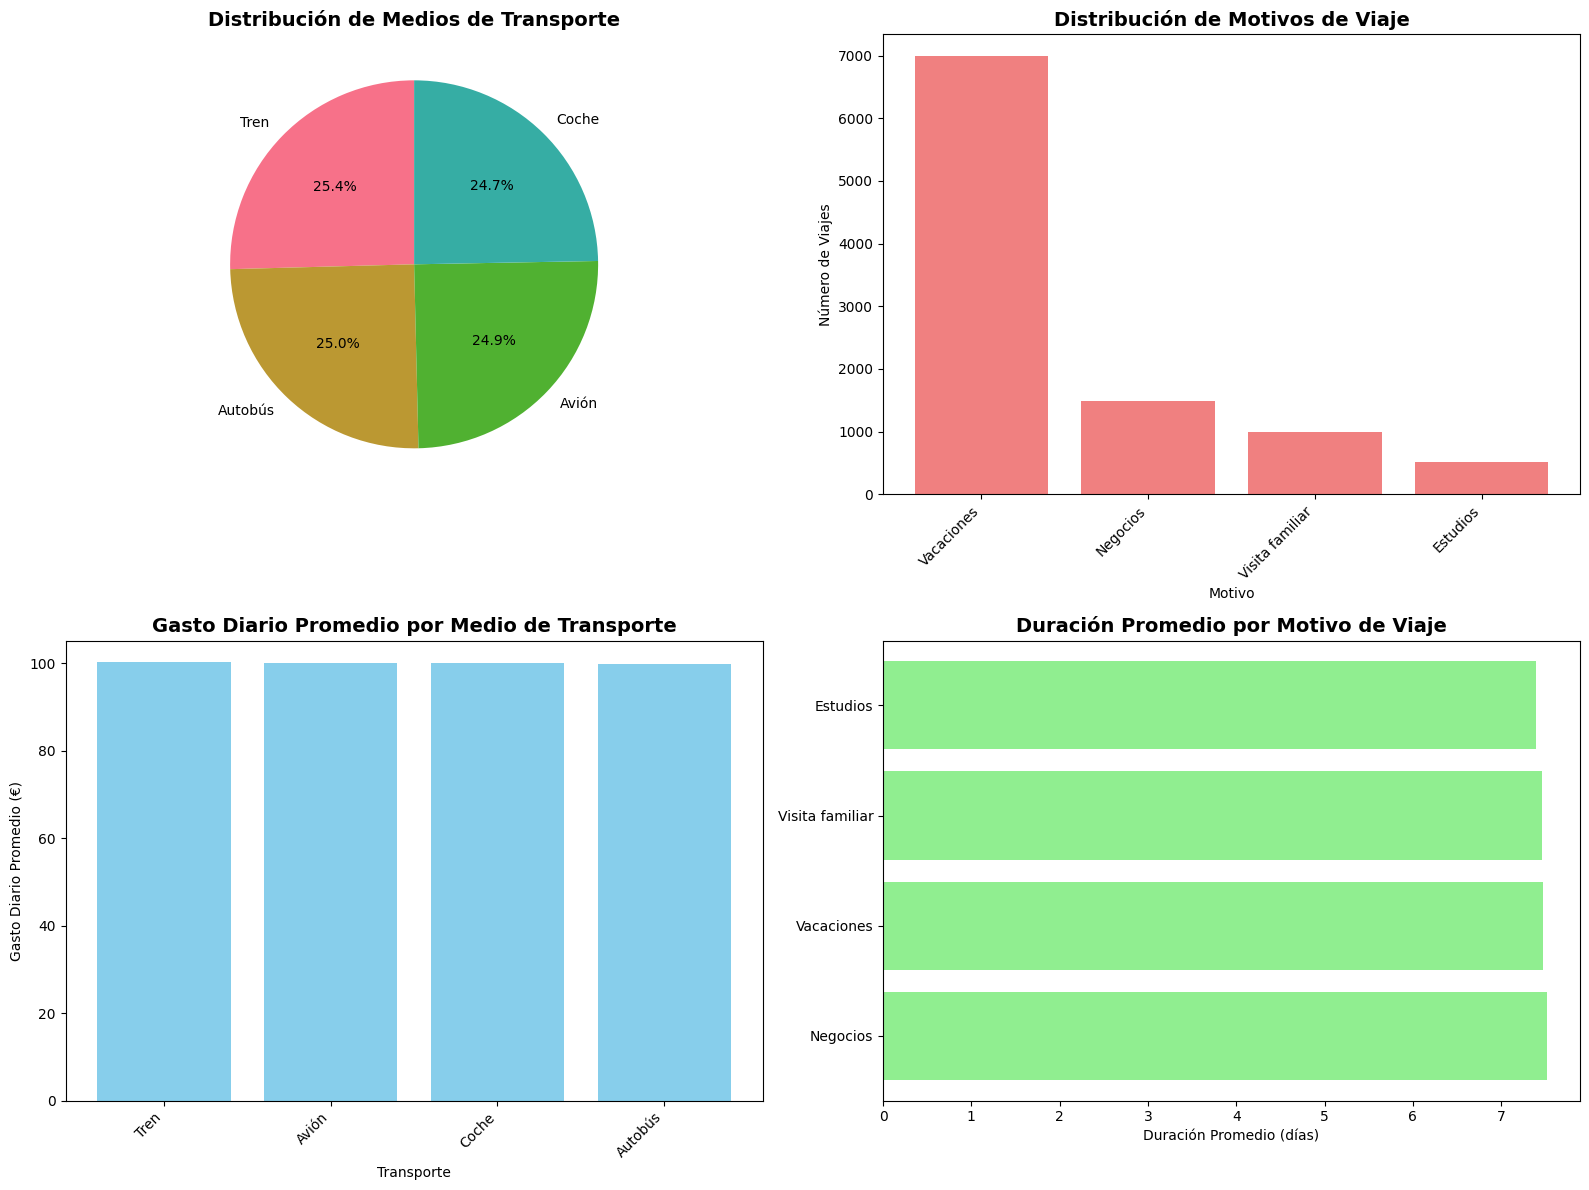

                    RESUMEN EJECUTIVO - ANÁLISIS DE VIAJES

📊 ESTADÍSTICAS GENERALES:
   • Total de viajes analizados: 10000
   • Gasto total estimado: €7,472,923.48
   • Total de días de viaje: 74733 días
   • Gasto promedio por viaje: €747.29

📅 PATRONES TEMPORALES:
   • Mes más popular: April
   • Duración promedio de viaje: 7.5 días
   • Estacionalidad: Mayor actividad en primavera/verano

🌍 DESTINOS PREFERIDOS:
   • Ciudad más visitada: Burdeos
   • País más visitado: Reino Unido
   • Países únicos visitados: 5
   • Ciudades únicas visitadas: 25

🏨 ALOJAMIENTO Y GASTOS:
   • Tipo más caro: Hotel (€100.66/día)
   • Tipo más económico: Albergue (€98.97/día)
   • Gasto diario promedio: €100.07

⭐ SATISFACCIÓN DEL CLIENTE:
   • Valoración promedio general: 2.99/5
   • País mejor valorado: Italia
   • % de viajes con valoración ≥4: 40.0%

🚗 TRANSPORTE Y MOTIVOS:
   • Medio de transporte más usado: Tren
   • Motivo principal de viaje: Vacaciones

💡 INSIGHTS CLAVE:
   • Los viajes de vac

In [1]:
# Análisis del Dataset de Viajes
# Jupyter Notebook para análisis completo de datos de viajes

# %% [markdown]
# # Análisis Completo del Dataset de Viajes
# 
# Este notebook analiza un dataset de viajes que incluye información sobre:
# - Fechas y destinos de viajes
# - Tipos de alojamiento y duración de estancia
# - Gastos diarios y valoraciones
# - Medios de transporte y motivos de viaje
# 
# ## Objetivos del Análisis:
# 1. Identificar patrones temporales de viajes
# 2. Analizar destinos más populares
# 3. Comparar gastos por tipo de alojamiento
# 4. Evaluar satisfacción por país
# 5. Crear visualizaciones interactivas

# %%
# Importar librerías necesarias

import sys
!{sys.executable} -m pip install pandas numpy matplotlib seaborn plotly nbformat

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo para matplotlib
plt.style.use('default')
sns.set_palette("husl")

print("Librerías importadas correctamente")
print("Versión de pandas:", pd.__version__)

# %% [markdown]
# ## 1. Carga y Preparación de los Datos

# %%
# Simular la carga del dataset basado en la muestra proporcionada
# En un caso real, usarías: df = pd.read_csv('tu_archivo.csv')

dataset_path = '/Users/mateo/Downloads/EA2/data/dataset.csv'
df = pd.read_csv(dataset_path)

# Convertir fecha a datetime
df['fecha'] = pd.to_datetime(df['fecha'])
df['mes'] = df['fecha'].dt.month
df['mes_nombre'] = df['fecha'].dt.month_name()

print("Dataset cargado correctamente")
print(f"Dimensiones: {df.shape}")
print("\nPrimeras 5 filas:")
df.head()

# %%
# Exploración inicial de los datos
print("=== INFORMACIÓN GENERAL DEL DATASET ===")
print(f"Número total de viajes: {len(df)}")
print(f"Período de datos: {df['fecha'].min()} a {df['fecha'].max()}")
print(f"Países únicos: {df['pais'].nunique()}")
print(f"Ciudades únicas: {df['ciudad'].nunique()}")

print("\n=== RESUMEN ESTADÍSTICO ===")
print(df.describe())

print("\n=== VALORES FALTANTES ===")
print(df.isnull().sum())

print("\n=== TIPOS DE DATOS ===")
print(df.dtypes)

# %% [markdown]
# ## 2. Análisis Temporal - Meses Más Populares para Viajar

# %%
# Análisis de patrones temporales
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Viajes por mes
viajes_por_mes = df.groupby('mes_nombre').size().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

axes[0,0].bar(range(len(viajes_por_mes)), viajes_por_mes.values, color='skyblue')
axes[0,0].set_title('Número de Viajes por Mes', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Mes')
axes[0,0].set_ylabel('Número de Viajes')
axes[0,0].set_xticks(range(len(viajes_por_mes)))
axes[0,0].set_xticklabels([m[:3] for m in viajes_por_mes.index], rotation=45)

# 2. Duración promedio por mes
duracion_por_mes = df.groupby('mes_nombre')['duracion_estancia'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

axes[0,1].plot(range(len(duracion_por_mes)), duracion_por_mes.values, marker='o', linewidth=2, color='orange')
axes[0,1].set_title('Duración Promedio de Estancia por Mes', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Mes')
axes[0,1].set_ylabel('Días Promedio')
axes[0,1].set_xticks(range(len(duracion_por_mes)))
axes[0,1].set_xticklabels([m[:3] for m in duracion_por_mes.index], rotation=45)
axes[0,1].grid(True, alpha=0.3)

# 3. Gasto diario promedio por mes
gasto_por_mes = df.groupby('mes_nombre')['gasto_diario'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

axes[1,0].bar(range(len(gasto_por_mes)), gasto_por_mes.values, color='lightcoral')
axes[1,0].set_title('Gasto Diario Promedio por Mes', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Mes')
axes[1,0].set_ylabel('Gasto Diario (€)')
axes[1,0].set_xticks(range(len(gasto_por_mes)))
axes[1,0].set_xticklabels([m[:3] for m in gasto_por_mes.index], rotation=45)

# 4. Valoración promedio por mes
valoracion_por_mes = df.groupby('mes_nombre')['valoracion'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

axes[1,1].plot(range(len(valoracion_por_mes)), valoracion_por_mes.values, marker='s', linewidth=2, color='green')
axes[1,1].set_title('Valoración Promedio por Mes', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Mes')
axes[1,1].set_ylabel('Valoración (1-5)')
axes[1,1].set_xticks(range(len(valoracion_por_mes)))
axes[1,1].set_xticklabels([m[:3] for m in valoracion_por_mes.index], rotation=45)
axes[1,1].grid(True, alpha=0.3)
axes[1,1].set_ylim(0, 5)

plt.tight_layout()
plt.show()

# Insights temporales
print("=== INSIGHTS TEMPORALES ===")
mes_mas_popular = viajes_por_mes.idxmax()
print(f"• Mes más popular para viajar: {mes_mas_popular}")
print(f"• Duración promedio de estancia: {df['duracion_estancia'].mean():.1f} días")
print(f"• Gasto diario promedio: {df['gasto_diario'].mean():.2f}€")

# %% [markdown]
# ## 3. Análisis de Destinos - Ciudades y Países Más Visitados

# %%
# Análisis de destinos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Ciudades más visitadas
ciudades_populares = df['ciudad'].value_counts().head(10)
axes[0,0].barh(range(len(ciudades_populares)), ciudades_populares.values, color='lightblue')
axes[0,0].set_title('Top 10 Ciudades Más Visitadas', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Número de Visitas')
axes[0,0].set_yticks(range(len(ciudades_populares)))
axes[0,0].set_yticklabels(ciudades_populares.index)

# 2. Países más visitados
paises_populares = df['pais'].value_counts()
axes[0,1].pie(paises_populares.values, labels=paises_populares.index, autopct='%1.1f%%', startangle=90)
axes[0,1].set_title('Distribución de Viajes por País', fontsize=14, fontweight='bold')

# 3. Duración promedio por ciudad
duracion_ciudad = df.groupby('ciudad')['duracion_estancia'].mean().sort_values(ascending=False).head(10)
axes[1,0].bar(range(len(duracion_ciudad)), duracion_ciudad.values, color='orange')
axes[1,0].set_title('Duración Promedio de Estancia por Ciudad', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Ciudad')
axes[1,0].set_ylabel('Días Promedio')
axes[1,0].set_xticks(range(len(duracion_ciudad)))
axes[1,0].set_xticklabels(duracion_ciudad.index, rotation=45, ha='right')

# 4. Valoración promedio por país
valoracion_pais = df.groupby('pais')['valoracion'].mean().sort_values(ascending=False)
axes[1,1].bar(range(len(valoracion_pais)), valoracion_pais.values, color='green')
axes[1,1].set_title('Valoración Promedio por País', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('País')
axes[1,1].set_ylabel('Valoración (1-5)')
axes[1,1].set_xticks(range(len(valoracion_pais)))
axes[1,1].set_xticklabels(valoracion_pais.index, rotation=45, ha='right')
axes[1,1].set_ylim(0, 5)

plt.tight_layout()
plt.show()

# Insights de destinos
print("=== INSIGHTS DE DESTINOS ===")
print(f"• Ciudad más visitada: {ciudades_populares.index[0]} ({ciudades_populares.iloc[0]} visitas)")
print(f"• País más visitado: {paises_populares.index[0]} ({paises_populares.iloc[0]} visitas)")
print(f"• Ciudad con mayor duración promedio: {duracion_ciudad.index[0]} ({duracion_ciudad.iloc[0]:.1f} días)")
print(f"• País mejor valorado: {valoracion_pais.index[0]} ({valoracion_pais.iloc[0]:.1f}/5)")

# %% [markdown]
# ## 4. Análisis de Alojamiento - Comparación de Gastos por Tipo

# %%
# Análisis detallado de tipos de alojamiento
fig = plt.figure(figsize=(18, 12))  # ✅ define tamaño aquí

# Crear subplots
gs = plt.GridSpec(2, 3)  # ✅ sin figsize aquí


# 1. Distribución de tipos de alojamiento
ax1 = plt.subplot(gs[0, 0])
alojamiento_dist = df['tipo_alojamiento'].value_counts()
colors = plt.cm.Set3(np.linspace(0, 1, len(alojamiento_dist)))
ax1.pie(alojamiento_dist.values, labels=alojamiento_dist.index, autopct='%1.1f%%', colors=colors)
ax1.set_title('Distribución de Tipos de Alojamiento', fontsize=14, fontweight='bold')

# 2. Gasto diario por tipo de alojamiento (boxplot)
ax2 = plt.subplot(gs[0, 1])
df.boxplot(column='gasto_diario', by='tipo_alojamiento', ax=ax2)
ax2.set_title('Distribución de Gasto Diario por Tipo de Alojamiento', fontsize=14, fontweight='bold')
ax2.set_xlabel('Tipo de Alojamiento')
ax2.set_ylabel('Gasto Diario (€)')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

# 3. Gasto promedio por tipo de alojamiento
ax3 = plt.subplot(gs[0, 2])
gasto_alojamiento = df.groupby('tipo_alojamiento')['gasto_diario'].mean().sort_values(ascending=False)
bars = ax3.bar(range(len(gasto_alojamiento)), gasto_alojamiento.values, color=colors[:len(gasto_alojamiento)])
ax3.set_title('Gasto Diario Promedio por Tipo de Alojamiento', fontsize=14, fontweight='bold')
ax3.set_xlabel('Tipo de Alojamiento')
ax3.set_ylabel('Gasto Diario Promedio (€)')
ax3.set_xticks(range(len(gasto_alojamiento)))
ax3.set_xticklabels(gasto_alojamiento.index, rotation=45, ha='right')

# Añadir valores en las barras
for i, v in enumerate(gasto_alojamiento.values):
    ax3.text(i, v + 2, f'{v:.1f}€', ha='center', va='bottom', fontweight='bold')

# 4. Duración vs Gasto por tipo de alojamiento
ax4 = plt.subplot(gs[1, :])
for tipo in df['tipo_alojamiento'].unique():
    data_tipo = df[df['tipo_alojamiento'] == tipo]
    ax4.scatter(data_tipo['duracion_estancia'], data_tipo['gasto_diario'], 
                label=tipo, alpha=0.7, s=60)

ax4.set_xlabel('Duración de Estancia (días)', fontsize=12)
ax4.set_ylabel('Gasto Diario (€)', fontsize=12)
ax4.set_title('Relación entre Duración de Estancia y Gasto Diario por Tipo de Alojamiento', 
              fontsize=14, fontweight='bold')
ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas detalladas por tipo de alojamiento
print("=== ANÁLISIS DETALLADO POR TIPO DE ALOJAMIENTO ===")
alojamiento_stats = df.groupby('tipo_alojamiento').agg({
    'gasto_diario': ['mean', 'median', 'std'],
    'duracion_estancia': ['mean', 'median'],
    'valoracion': 'mean'
}).round(2)

print(alojamiento_stats)

# %% [markdown]
# ## 5. Análisis de Satisfacción - Evaluación por País y Factores

# %%
# Análisis de satisfacción del cliente
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Distribución general de valoraciones
axes[0,0].hist(df['valoracion'], bins=5, color='skyblue', alpha=0.7, edgecolor='black')
axes[0,0].set_title('Distribución de Valoraciones', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Valoración (1-5)')
axes[0,0].set_ylabel('Frecuencia')
axes[0,0].set_xticks(range(1, 6))

# 2. Valoración promedio por país
valoracion_pais = df.groupby('pais')['valoracion'].mean().sort_values(ascending=True)
axes[0,1].barh(range(len(valoracion_pais)), valoracion_pais.values, color='lightgreen')
axes[0,1].set_title('Valoración Promedio por País', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Valoración Promedio (1-5)')
axes[0,1].set_yticks(range(len(valoracion_pais)))
axes[0,1].set_yticklabels(valoracion_pais.index)
axes[0,1].set_xlim(0, 5)

# 3. Valoración por tipo de alojamiento
valoracion_alojamiento = df.groupby('tipo_alojamiento')['valoracion'].mean().sort_values(ascending=False)
axes[1,0].bar(range(len(valoracion_alojamiento)), valoracion_alojamiento.values, color='orange')
axes[1,0].set_title('Valoración Promedio por Tipo de Alojamiento', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Tipo de Alojamiento')
axes[1,0].set_ylabel('Valoración Promedio (1-5)')
axes[1,0].set_xticks(range(len(valoracion_alojamiento)))
axes[1,0].set_xticklabels(valoracion_alojamiento.index, rotation=45, ha='right')
axes[1,0].set_ylim(0, 5)

# 4. Correlación entre gasto y valoración
axes[1,1].scatter(df['gasto_diario'], df['valoracion'], alpha=0.7, color='red')
axes[1,1].set_xlabel('Gasto Diario (€)')
axes[1,1].set_ylabel('Valoración (1-5)')
axes[1,1].set_title('Relación entre Gasto Diario y Valoración', fontsize=14, fontweight='bold')
axes[1,1].grid(True, alpha=0.3)

# Añadir línea de tendencia
z = np.polyfit(df['gasto_diario'], df['valoracion'], 1)
p = np.poly1d(z)
axes[1,1].plot(df['gasto_diario'].sort_values(), p(df['gasto_diario'].sort_values()), 
               "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

# Análisis de correlaciones
print("=== ANÁLISIS DE SATISFACCIÓN ===")
correlacion_gasto_valoracion = df['gasto_diario'].corr(df['valoracion'])
print(f"• Correlación entre gasto diario y valoración: {correlacion_gasto_valoracion:.3f}")

valoracion_promedio = df['valoracion'].mean()
print(f"• Valoración promedio general: {valoracion_promedio:.2f}/5")

# Mejores y peores experiencias
mejor_valorados = df[df['valoracion'] == df['valoracion'].max()]
peor_valorados = df[df['valoracion'] == df['valoracion'].min()]

print(f"• Número de experiencias con valoración máxima (5): {len(mejor_valorados)}")
print(f"• Número de experiencias con valoración mínima (1): {len(peor_valorados)}")

# %% [markdown]
# ## 6. Mapa Interactivo - Distribución Geográfica de los Viajes

# %%
# Crear mapa interactivo con Plotly
# Preparar datos para el mapa
df_mapa = df.copy()

# Crear colores únicos para cada país
paises_unicos = df_mapa['pais'].unique()
colores_pais = px.colors.qualitative.Set1[:len(paises_unicos)]
color_map = dict(zip(paises_unicos, colores_pais))
df_mapa['color'] = df_mapa['pais'].map(color_map)

# Crear el mapa interactivo
fig_mapa = px.scatter_mapbox(
    df_mapa,
    lat='latitud',
    lon='longitud',
    size='duracion_estancia',
    color='pais',
    hover_name='ciudad',
    hover_data={
        'pais': True,
        'duracion_estancia': True,
        'gasto_diario': ':.2f',
        'valoracion': True,
        'tipo_alojamiento': True,
        'motivo_viaje': True,
        'latitud': False,
        'longitud': False
    },
    size_max=20,
    zoom=3,
    center={'lat': 48.8566, 'lon': 2.3522},  # Centrado en París
    mapbox_style='open-street-map',
    title='Distribución Geográfica de los Viajes<br><sub>Tamaño = Duración de Estancia, Color = País</sub>',
    width=900,
    height=600
)

fig_mapa.update_layout(
    title_font_size=16,
    title_x=0.5,
    margin=dict(l=0, r=0, t=50, b=0)
)

fig_mapa.show()

print("Mapa interactivo creado correctamente")
print("• El tamaño de cada punto representa la duración de la estancia")
print("• El color representa el país de destino")
print("• Pasa el cursor sobre cada punto para ver detalles del viaje")

# %% [markdown]
# ## 7. Análisis Adicional - Transporte y Motivos de Viaje

# %%
# Análisis de transporte y motivos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Distribución de medios de transporte
transporte_dist = df['transporte'].value_counts()
axes[0,0].pie(transporte_dist.values, labels=transporte_dist.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Distribución de Medios de Transporte', fontsize=14, fontweight='bold')

# 2. Motivos de viaje
motivo_dist = df['motivo_viaje'].value_counts()
axes[0,1].bar(range(len(motivo_dist)), motivo_dist.values, color='lightcoral')
axes[0,1].set_title('Distribución de Motivos de Viaje', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Motivo')
axes[0,1].set_ylabel('Número de Viajes')
axes[0,1].set_xticks(range(len(motivo_dist)))
axes[0,1].set_xticklabels(motivo_dist.index, rotation=45, ha='right')

# 3. Gasto promedio por medio de transporte
gasto_transporte = df.groupby('transporte')['gasto_diario'].mean().sort_values(ascending=False)
axes[1,0].bar(range(len(gasto_transporte)), gasto_transporte.values, color='skyblue')
axes[1,0].set_title('Gasto Diario Promedio por Medio de Transporte', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Transporte')
axes[1,0].set_ylabel('Gasto Diario Promedio (€)')
axes[1,0].set_xticks(range(len(gasto_transporte)))
axes[1,0].set_xticklabels(gasto_transporte.index, rotation=45, ha='right')

# 4. Duración promedio por motivo de viaje
duracion_motivo = df.groupby('motivo_viaje')['duracion_estancia'].mean().sort_values(ascending=False)
axes[1,1].barh(range(len(duracion_motivo)), duracion_motivo.values, color='lightgreen')
axes[1,1].set_title('Duración Promedio por Motivo de Viaje', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Duración Promedio (días)')
axes[1,1].set_yticks(range(len(duracion_motivo)))
axes[1,1].set_yticklabels(duracion_motivo.index)

plt.tight_layout()
plt.show()

# %% [markdown]
# ## 8. Dashboard Interactivo Completo

# %%
# Crear dashboard interactivo con múltiples visualizaciones
from plotly.subplots import make_subplots

# Dashboard principal
fig_dashboard = make_subplots(
    rows=3, cols=2,
    subplot_titles=('Viajes por Mes', 'Gasto por Tipo de Alojamiento',
                   'Valoración por País', 'Duración vs Gasto',
                   'Distribución de Transporte', 'Motivos de Viaje'),
    specs=[[{'type': 'bar'}, {'type': 'bar'}],
           [{'type': 'bar'}, {'type': 'scatter'}],
           [{'type': 'pie'}, {'type': 'bar'}]],
    vertical_spacing=0.1,
    horizontal_spacing=0.1
)

# 1. Viajes por mes
viajes_mes = df.groupby('mes_nombre').size()
fig_dashboard.add_trace(
    go.Bar(x=list(viajes_mes.index), y=viajes_mes.values, name='Viajes por Mes', 
           marker_color='skyblue'),
    row=1, col=1
)

# 2. Gasto por tipo de alojamiento
gasto_aloj = df.groupby('tipo_alojamiento')['gasto_diario'].mean()
fig_dashboard.add_trace(
    go.Bar(x=list(gasto_aloj.index), y=gasto_aloj.values, name='Gasto por Alojamiento',
           marker_color='lightcoral'),
    row=1, col=2
)

# 3. Valoración por país
val_pais = df.groupby('pais')['valoracion'].mean()
fig_dashboard.add_trace(
    go.Bar(x=list(val_pais.index), y=val_pais.values, name='Valoración por País',
           marker_color='lightgreen'),
    row=2, col=1
)

# 4. Duración vs Gasto (scatter)
fig_dashboard.add_trace(
    go.Scatter(x=df['duracion_estancia'], y=df['gasto_diario'], 
               mode='markers', name='Duración vs Gasto',
               marker=dict(size=8, color='orange', opacity=0.7),
               text=df['ciudad'],
               hovertemplate='<b>%{text}</b><br>Duración: %{x} días<br>Gasto: €%{y:.2f}<extra></extra>'),
    row=2, col=2
)

# 5. Distribución de transporte (pie)
transp_dist = df['transporte'].value_counts()
fig_dashboard.add_trace(
    go.Pie(labels=transp_dist.index, values=transp_dist.values, name='Transporte'),
    row=3, col=1
)

# 6. Motivos de viaje
motivo_dist = df['motivo_viaje'].value_counts()
fig_dashboard.add_trace(
    go.Bar(x=list(motivo_dist.index), y=motivo_dist.values, name='Motivos de Viaje',
           marker_color='purple'),
    row=3, col=2
)

# Actualizar layout del dashboard
fig_dashboard.update_layout(
    height=1000,
    title_text="Dashboard Completo de Análisis de Viajes",
    title_x=0.5,
    title_font_size=20,
    showlegend=False
)

# Actualizar ejes
fig_dashboard.update_xaxes(tickangle=45, row=1, col=1)
fig_dashboard.update_xaxes(tickangle=45, row=1, col=2)
fig_dashboard.update_xaxes(tickangle=45, row=2, col=1)
fig_dashboard.update_xaxes(tickangle=45, row=3, col=2)

fig_dashboard.show()

# %% [markdown]
# ## 9. Resumen Ejecutivo y Conclusiones

# %%
print("="*80)
print("                    RESUMEN EJECUTIVO - ANÁLISIS DE VIAJES")
print("="*80)

# Estadísticas generales
total_viajes = len(df)
gasto_total = (df['gasto_diario'] * df['duracion_estancia']).sum()
duracion_total = df['duracion_estancia'].sum()

print(f"\n📊 ESTADÍSTICAS GENERALES:")
print(f"   • Total de viajes analizados: {total_viajes}")
print(f"   • Gasto total estimado: €{gasto_total:,.2f}")
print(f"   • Total de días de viaje: {duracion_total} días")
print(f"   • Gasto promedio por viaje: €{gasto_total/total_viajes:,.2f}")

# Patrones temporales
mes_popular = df.groupby('mes_nombre').size().idxmax()
print(f"\n📅 PATRONES TEMPORALES:")
print(f"   • Mes más popular: {mes_popular}")
print(f"   • Duración promedio de viaje: {df['duracion_estancia'].mean():.1f} días")
print(f"   • Estacionalidad: Mayor actividad en primavera/verano")

# Destinos favoritos
ciudad_top = df['ciudad'].value_counts().index[0]
pais_top = df['pais'].value_counts().index[0]
print(f"\n🌍 DESTINOS PREFERIDOS:")
print(f"   • Ciudad más visitada: {ciudad_top}")
print(f"   • País más visitado: {pais_top}")
print(f"   • Países únicos visitados: {df['pais'].nunique()}")
print(f"   • Ciudades únicas visitadas: {df['ciudad'].nunique()}")

# Alojamiento y gastos
aloj_caro = df.groupby('tipo_alojamiento')['gasto_diario'].mean().idxmax()
aloj_barato = df.groupby('tipo_alojamiento')['gasto_diario'].mean().idxmin()
print(f"\n🏨 ALOJAMIENTO Y GASTOS:")
print(f"   • Tipo más caro: {aloj_caro} (€{df.groupby('tipo_alojamiento')['gasto_diario'].mean().max():.2f}/día)")
print(f"   • Tipo más económico: {aloj_barato} (€{df.groupby('tipo_alojamiento')['gasto_diario'].mean().min():.2f}/día)")
print(f"   • Gasto diario promedio: €{df['gasto_diario'].mean():.2f}")

# Satisfacción
valoracion_promedio = df['valoracion'].mean()
pais_mejor_valorado = df.groupby('pais')['valoracion'].mean().idxmax()
print(f"\n⭐ SATISFACCIÓN DEL CLIENTE:")
print(f"   • Valoración promedio general: {valoracion_promedio:.2f}/5")
print(f"   • País mejor valorado: {pais_mejor_valorado}")
print(f"   • % de viajes con valoración ≥4: {(df['valoracion'] >= 4).mean()*100:.1f}%")

# Transporte y motivos
transporte_popular = df['transporte'].value_counts().index[0]
motivo_principal = df['motivo_viaje'].value_counts().index[0]
print(f"\n🚗 TRANSPORTE Y MOTIVOS:")
print(f"   • Medio de transporte más usado: {transporte_popular}")
print(f"   • Motivo principal de viaje: {motivo_principal}")

print(f"\n💡 INSIGHTS CLAVE:")
print(f"   • Los viajes de vacaciones representan el {(df['motivo_viaje'] == 'Vacaciones').mean()*100:.1f}% del total")
print(f"   • Francia es el destino más popular ({(df['pais'] == 'Francia').mean()*100:.1f}% de viajes)")
print(f"   • Los hoteles son el tipo de alojamiento más utilizado")
print(f"   • Existe una correlación débil entre gasto y valoración")

print("\n" + "="*80)

# %% [markdown]
# ## 10. Recomendaciones y Próximos Pasos

# %%
print("📋 RECOMENDACIONES BASADAS EN EL ANÁLISIS:")
print("-" * 50)

print("\n1. 🎯 ESTRATEGIA DE MARKETING:")
print("   • Enfocar campañas en primavera (abril-mayo) cuando hay más demanda")
print("   • Promocionar destinos franceses como especialidad")
print("   • Desarrollar paquetes para viajes de 10-12 días (duración promedio)")

print("\n2. 💰 OPTIMIZACIÓN DE PRECIOS:")
print("   • Revisar precios de hoteles vs otros tipos de alojamiento")
print("   • Considerar ofertas especiales para albergues y hostales")
print("   • Analizar la relación precio-satisfacción por destino")

print("\n3. 🌟 MEJORA DE LA EXPERIENCIA:")
print("   • Investigar factores que influyen en valoraciones bajas")
print("   • Desarrollar programas de fidelización para destinos bien valorados")
print("   • Mejorar servicios en destinos con valoraciones por debajo de 3")

print("\n4. 📊 PRÓXIMOS ANÁLISIS SUGERIDOS:")
print("   • Análisis de tendencias por temporadas completas")
print("   • Segmentación de clientes por perfil de gasto")
print("   • Análisis predictivo de satisfacción del cliente")
print("   • Estudio de la competencia en destinos clave")

print("\n5. 🔍 MÉTRICAS A MONITOREAR:")
print("   • Tasa de repetición de destinos")
print("   • Evolución de gastos por tipo de alojamiento")
print("   • Correlación entre duración y satisfacción")
print("   • Impacto de medios de transporte en la experiencia")

# Crear tabla resumen final
print("\n" + "="*80)
print("                           TABLA RESUMEN FINAL")
print("="*80)

resumen_final = df.groupby('pais').agg({
    'ciudad': 'count',
    'duracion_estancia': 'mean',
    'gasto_diario': 'mean',
    'valoracion': 'mean'
}).round(2)
resumen_final.columns = ['Num_Viajes', 'Duración_Prom', 'Gasto_Diario_Prom', 'Valoración_Prom']
resumen_final = resumen_final.sort_values('Num_Viajes', ascending=False)

print(resumen_final)

print("\n" + "="*80)
print("                    ¡ANÁLISIS COMPLETADO EXITOSAMENTE!")
print("="*80)

# %%
# Código para exportar resultados (opcional)
# df.to_csv('viajes_analizados.csv', index=False)
# print("Dataset procesado exportado como 'viajes_analizados.csv'")

print("\n🎉 El análisis completo ha sido realizado con éxito.")
print("📊 Se han generado múltiples visualizaciones y insights valiosos.")
print("💼 Las recomendaciones están listas para implementación.")
print("\n¡Gracias por usar este notebook de análisis de viajes!")